![alt text](img/LM.png)
# Kurs: Warsztaty Machine learning w Pythonie

## Prowadzący: Piotr Ćwiakowski

## Autorzy: Piotr Ćwiakowski, Maciej Wilamowski

### Lekcja 6. KNN (K-Nearest Neighbors)

#### Spis treści:

1. Opis algorytmu.  
2. Estymacja KNN w Pythonie

#  1. Opis algorytmu

## 1.1. Wprowadzenie i idea algorytmu
Do tej pory próbowaliśmy budować estymator $\hat{F}(X)$ zakładając pewną postać funkcji (metody regresji liniowej) lub szukając hiperpłaszczy rozdzielającej obserwacje (SVM). Teraz przyjrzymy się innemu podejściu, które bazuje na jednym podstawowym założeniu:

* Najlepszą predykcję dla pewnej obserwacji stanowi znana wartość (etykieta) dla obserwacji ze zbioru treningowego, która jest najbardziej podobna (najbliższa) do obserwacji dla której prognozujemy.

Założenie to wydaje się być bardzo sensowne. Jeżeli w swoim zbiorze treningowym dysponuję "bliźniakiem" dla akurat prognozowanej obserwacji to powinienem po prostu skopiować znaną etykietę. Jednak co w sytuacji, w której nie znajdziemy idealnego bliźniaka?

Wtedy możemy znaleźć najbliższych sąsiadów dla prognozowanej obserwacji. Kiedy już znajdziemy dla pewnej obserwacji k najbliższych sąsiadów (liczbę k i sposób ustalania najbliższych obserwacji musimy ustalić, powiemy o tym później), predykcję dla tej obserwacji generujemy patrząc na etykietę przypisaną tym obserwacjom w zbiorze treningowym:
* w problemie klasyfikacji binarnej będzie to prawdopodobieństwo jako udział "1" w grupie najbliższych sąsiadów.
* w klasyfikacji wielomianowej powstanie wektor prawdopodobieństw mówiący o udziałach poszczególnych klas w grupie sąsiadów.
* w przypadku regresji możemy wyciągnąć średnią lub średnią ważoną dystansem.

<img src="img/knn.png" width="40%" height="40%">
Źródło: https://github.com/artifabrian/dynamic-knn-gpu

Zauważmy, że w algorytmie KNN nie ma fazy uczenia - przygotowaniem modelu jest po prostu zdefiniowanie zbioru treningowego. Dla prognozowania najistotniejszy będzie zatem dobór hiperparametrów - definicji podobieństwa punktów i liczba najbliższych sąsiadów (zwyczajowo oznacza literą k). Zastanówmy się głębiej nad istotą każdego z nich.

## 1.2. Podobieństwo - bliskość.
Zastanówmy się co to znaczy, że dwie obserwacje są do siebie podobne. Można to sparafrazować, mowiąc że dwa punkty leżące w wielowymiarowej przestrzeni leżą blisko siebie. Właśnie odległość, w euklidesowym rozumieniu geometrii to podstawowa miara odległości punktów. Dla dwóch punktów $i$ i $j$ dana będzie wzorem:

$$d_e(i,j) = \sqrt{(x_{1i} - x_{1j})^2 + (x_{2i} - x_{2j})^2 + \ldots + (x_{pi} - x_{pj})^2}$$

Podobnie jak w przypadku funkcji straty mozemy się zastanawiać nad zasadnością podnoszenia różnic do kwadratu oraz ich późniejszego pierwiastkowania. Alternatywną funkcją odległości jest *Manhatan distance* (zwany też *City distance*).

$$d_c(i,j) = |x_{1i} - x_{1j}| + |x_{2i} - x_{2j}| + \ldots + |x_{pi} - x_{pj}|$$

Obydwie powyższe miary można uogólnić w postaci dystansu Minkowskiego:
$$d_M(i,j, \lambda) = \left(|x_{1i} - x_{1j}|^\lambda + |x_{2i} - x_{2j}|^\lambda + \ldots + |x_{pi} - x_{pj}|^\lambda\right)^{1/\lambda}$$

Przy $\lambda$ dążącym do nieskończoności otrzymujemy tzw. dystans Chebysheva. Różnice pomiędzy poszczególnymi miarami można zwizualizować w nastepujący sposób.
<img src="img/distances.png" width="60%" height="60%">

Źródło: https://lyfat.wordpress.com/2012/05/22/euclidean-vs-chebyshev-vs-manhattan-distance/

<img src="img/distances2.png" width="60%" height="60%">

Źródło: https://www.researchgate.net/figure/Points-in-a-2-dimensional-space-at-a-distance-of-1-from-the-center-O-using-the_fig1_283088044

## 1.3. Wady dystansów
Dystanse są bardzo pomocne w określaniu podobieństw, ale nie są pozbawione wad. Przede wszystkim jest to prosta, absolutna i abstrakcyjna miara. Stosowanie wartości absolutnych może silnie rzutować na zdolności predykcyjne kNN, np. w sytuacji w której jedna ze zmiennych objaśnianych operuje na dużo większej dziedzinie i jednocześnie nie ma dużej mocy predykcyjnej. W tej sytuacji ten jeden wymiar będzie bardzo silnie wpływał na odległość, może nawet zdominować wszystkie pozostałe zmienne i jednocześnie nie będzie pomagał w skutecznej predykcji.

Oczywistym rozwiązaniem powyższego problemu jest skalowanie/normalizacja/standaryzacja posiadanych zmiennych. Odpowiednie przygotowanie danych to krok, który niemal zawsze powinniśmy wykonać decydując sie na wykorzystanie kNN. Najczęściej stosowane metody standaryzacji zmiennych to:
* Prosta normalizacja, polegajaca na odjęciu średniej wartości i podzieleniu przez odchylenie standardowe (z-score): $z = {x- \mu \over \sigma}$
* Standaryzacja na przedziale [0,1], przez przesuniecie i podział przez "rozpiętość" $X\_new = \frac{X - min(X)}{max(X) - min(X)}$. Należy pamiętać, że stosowanie tego typu standaryzacji może przynieść bardzo duże "zagęszczenie" obserwacji w środku przedziału jeżeli wcześniej nasza zmienna miała rozkład przypominający normalny (o długich ogonach).
* Normalizacja kwantylowa. Możliwa jest równiez zmiana danego rozkladu zmienniej na niemalże dowolny inny rozkład z wykorzystaniem normalizacji kwantylowej (gdzie dopasowujemy nowe wartości patrząc na kwantyle rozkładu). Warto z niej pewnie korzystać, jedynie kiedy naprawdę jest się ekspertem w dziedzinie i dogłębnie rozumie konsekwencje przeprowadzanej transformacji.

## 1.4 Standaryzacja zmiennych nominalnych
Zmienne nominalne stanowią odrobinę inny problem. Możemy go rozwiązać stosując binaryzację poziomów lub w przypadku uporzadkowanej zmiennej wielopoziomowej rozłożyć wartości równomiernie na przestrzeni [0,1]. Standaryzacja zmiennych nominalnych dobrze ilustruje problem kNN i stosowania dystansu jako miary podobieństwa. Zmienna binarna oznacza że dystans na tej jednej zmiennej wynosić będzie 0 lub 1. Jednocześnie kiedy znormalizowaliśmy inną zmienną ciągłą na przedziale [0,1] ponad połowa obserwacji może leżeć od siebie w dystansie mniejszym niż 0,5. W takiej sytuacji nasza zmienna binarna ma poniekąd "dwukrotnie większą wagę". Właśnie ta arbitralność dystansów przy stosowaniu miar absolutnych może stanowić istotne ograniczenie skuteczności tej metody. Może się bowiem okazać, że model będzie się spisywał znacznie lepiej jeżeli zmienne binarne zakodujemy do poziomów {0; 0,5} lub {0; 2}, a może jeszcze lepiej jeżeli każdą z kilku zmiennych binarnych wystandaryzujemy inaczej.

## 1.5. Klątwa wymiarowości
Z metodą kNN bezpośrednio powiązany jest problem wymiarowości. Zastanówmy się przez chwilę co to znaczy, że dwie obserwacje leżą blisko siebie. Kiedy mówimy o dwóch, trzech wymiarach jest to oczywiste i intuicyjnie wyczuwalne. Kiedy mamy więcej wymiarów np. 16, to dwie obserwacje mogą być jednocześnie blisko i daleko w poszczególnych wymiarach. Osiągnięcie bliskości we wszystkich wymiarach jest prawie niewykonalne. Stanowi to istotny problem, ponieważ w wielu wymiarach możemy mieć kilka obserwacji, które są w równej odległości każda z każdą i jednocześnie zajmują zupełnie różne fragmenty przestrzeni - najprostszy przykład to macierz jednostkowa. Jest to problem, który w większości przypadków jest nierozwiązywalny. 

W niektórych zadaniach analitycznych możemy powiedzieć jednak, że problem wielowymiarowości nie jest bardzo dotkliwy. Z taką sytuacją mamy do czynienia np. w problemie rekomendacji kiedy często mamy do czynienia z macierzami rzadkimi lub w analizie obrazów gdzie bliskość we wszystkich wymiarach rzeczywiście może następować ze względu na silne korelacje wewnątrz grupowe i dobrą separację grup.

## 1.6. Wybór odpowiedniej wartości k (tuning kNN)
Kiedy zdecydujemy się już na jedną miarę dystansu i sposób standaryzacji zmiennych pozostaje wybrać odpowiednią wartość k. Wybór odpowiedniej zmiennej będzie miał duże znaczenie dla skuteczności algorytmu. Dla $k=1$ nasz algorytm będzie charakteryzował się (prawie na pewno) nadmiernym dopasowaniem i dużą wariancją błędu oszacowania.

Podnosząc $k$ z jednej strony zmniejszamy wariancję przez uśrednianie naszej predykcji, ale z drugiej musimy szukać sąsiadow w większej odległości. Zwiększa się szansa na to, że weźmiemy mocno niepodobną obserwację. Odpowiednią wartość $k$ należy znaleźć stosująć walidację krzyzową. W zdecydowanej większości przypadków $k$ będzie mniejsze niż $\sqrt N$, gdzie  $N$ to liczba obserwacji w zbiorze treningowym.

Ze względu na swoją naturę nasz zbiór powinien być na tyle duży, żeby wykorzystywane $k$ sąsiadów było rzeczywiście blisko prognozowanej obserwacji.

<img src="img/knn1.png">
Source: Elements of Statistical learning

## 1.7. kNN: porady praktyczne

### Selekcja zmiennych
Ze względu na arbitralność miary dystansu bardzo ważna jest selekcja zmiennych w problemie kNN. Jak wcześniej zauwazyliśmy, włączenie do zbioru zmiennych objasniających jednej zmiennej, która ma niską moc predykcyjną zdecydowanie obniża skuteczność kNN. Z tego powodu warto selekcji zmiennych poświęcić sporo czasu w przypadku tego algorytmu. Można zastosować selektywne usuwanie zmiennych lub wręcz przeciwnie stopniowe budowanie modelu od zera.

### Standaryzacja zmiennych
Problem standaryzacji jest powiązany z problemem selekcji. Dana zmienna może być przydatna i skuteczna kiedy będzie przekształcona w jeden sposób i niepotrzebna, wpływająca negatywnie na skuteczność predykcji przy innym przekształceniu. Z tego powodu należy przetestować kilka metod standaryzacji nawet wtedy kiedy zdecydujemy się na użycie danej zmiennej.

### Uśrednianie jako rozwiązanie problemu wymiarowości
Korzystając z wiedzy o skuteczności uśredniania możemy starać się rozwiązać problem wymiarowości tworząc wiele klasyfikatorów na podzbiorach. W tym przypadku najistotniejsze jest korzystanie z podzbiorów zmiennych objaśniających. W tym przypadku każdy pojedynczy klasyfikator nie będzie miał problemu z klątwą wymiarowości. Co więcej w ten sposób możemy również rozwiązać problem wpływu zmiennych nieistotnych na jakość predykcji klasyfikatora.

## 1.8 Podsumowanie: wady i zalety kNN w modelowaniu
Zalety:
* Algorytm jest prosty do zrozumienia. 
* Łatwo wytłumaczyć jak powstała dana predykcja.
* Odporność na obserwacje odstające.
* Brak jakichkolwiek założeń dotyczących rozkładów zmiennych.
* Wysoka skuteczność w wybranych zastosowaniach (np. rekomendacje, analiza obrazów czy też inne problemy z macierzami rzadkimi)
* Możliwośc stosowania w problemie klasyfikacji (w tym wielomianowej) i regresji.

Wady:
* Niska skuteczność w wielu przypadkach.
* Trudna interpretacja roli poszczególnych zmiennych w modelu we wpływie na wartość prognozowaną.
* Względnie niska prędkość generowania predykcji (konieczność liczenia wektora odległości dla każdego prognozowanego punktu).
* Metoda jest wrażliwa na dobór zmiennych i stosowanie niepotrzebnych zmiennych.
* Na etapie predykcji konieczne jest przechowywanie całego zbioru treningowego w pamięci.

# 2. kNN w Pythonie

## 2.1. Przygotowanie danych i środowiska

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

plt.style.use('seaborn-ticks')
%matplotlib inline

W pierwszym kroku wczytamy zbiór danych i przygotujemy je tak samo jak dla algorytmu SVM. Dane podzielimy na numeryczne oraz kategoryczne, zmienne binarne przekształcimy przez one-hot encoding, a następnie znormalizujemy wszystkie zmienne.

In [2]:
df_o = pd.read_csv("data/bank-balanced.csv")
print(df_o.shape)
df_o.head()

(11162, 17)


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
df_o.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
target = "deposit"

In [5]:
numFeatures = ['age', 'balance', 'duration', 'campaign', 'pdays','previous', 'day']

In [6]:
catFeatures = [ 'job', 'marital', 'education', 'default',  'housing', 'loan', 'contact',  'month', 'poutcome']

In [7]:
# One hot encoding
dummLev = pd.get_dummies(df_o[catFeatures], drop_first=True)

# Połączenie zmiennych numerycznych, kategorycznych w postaci on hot encoding oraz targetu
df = pd.concat([df_o[numFeatures], dummLev, df_o[[target]]], axis=1)

In [8]:
df.shape

(11162, 43)

In [9]:
df.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'deposit'],
      dtype='object')

In [10]:
df[target].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [11]:
df[numFeatures] = df[numFeatures].apply(lambda x: (x-x.mean())/x.std())

In [12]:
features = df.columns.tolist()
features.remove(target)
print(features)

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


Naszą funkcję do walidacji krzyżowej przygotujemy bazując na wersji SVM. Musimy dokonać tylko dwóch zmian:
* zmienić estymator na kNN ```clf = neighbors.KNeighborsClassifier()```
* usunąć samplowanie - korzystając z kNN nie napotkamy na problem wydajnościowe przy tym zbiorze.
Wszystkie pozostałe elementy funkcji pozostaną bez zmian.

## 2.2. Walidacja pierwszego modelu

In [13]:
# Wczytanie potrzebnych bibliotek
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import roc_auc_score

# Przygotujmy wrapper
def CVTestKNN(nFolds = 5, randomState=2020, debug=False, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Listy z wynikami
    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    # Pętla walidująca model na kolejnych foldach
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = neighbors.KNeighborsClassifier(*args, **kwargs)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        # Przygotowanie prognoz dla zbioru treningowego i testowego
        # UWAGA Sklearn zwracał będzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Policzenie ROC-AUC dla foldów
        trainScore = roc_auc_score((df[target].iloc[train]=="yes").astype(int), predsTrain)
        testScore = roc_auc_score((df[target].iloc[test]=="yes").astype(int), preds)
        
        # Zapisanie wyników dla foldów
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

W ramach pierwszego testowego uruchomienia możemy sprawdzić jak zachowa się algorytm kiedy jako metrykę użyjemy dystansu minkowskiego z parametrem `p=2`, co oznacza ustawienie z odległościami euklidesowymi. Konfigurując `n_jobs=-1` użyjemy wszystkich rdzeni co pozwoli na relatywnie szybkie uzyskanie wyników. Wybierzmy na początek 50 najbliższych sąsiadów `n=50`.

In [14]:
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=50, n_jobs=-1, p=2, debug=True)
print(np.mean(testResults))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
Train AUC: 0.9045826243324572 Valid AUC: 0.8905143617354587
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
Train AUC: 0.9033008193272006 Valid AUC: 0.9035597392540502
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
Train AUC: 0.9040898278908048 Valid AUC: 0.9030770813458273
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
Train AUC: 0.906312343584106 Valid AUC: 0.8859970816492555
KNeighborsClassif

Na tym etapie nie musimy wizualizować krzywej ROC i zapisywać najlepszego wyniku. Możemy to zrobić dopiero pod koniec, kiedy już wybierzemy najlepszą specyfikację modelu. Na razie wystarczy nam ewaluacja średniej wartości `roc auc score` z poszczególnych foldów.

## 2.3. Tuning hiperparametrów kNN

### Wybór odpowiedniego k
Zwykle pierwszym krokiem jest wybranie odpowiedniej liczby najbliższych sąsiadów. Dzięki poprawnie zaimplementowanej walidacji krzyżowej możemy to zrobić analizując wyniki w walidacji. Im lepszy wynik, tym najprawdopodobniej najbardziej odpowiednia liczba k.

In [16]:
# Ta pętla przechodzi po wartościach k i dla każdej wykonuje walidację krzyżową.
for k in [1, 3, 5, 10, 15, 30, 50, 100, 150, 200]:
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=k, n_jobs=-1, p=2)
    print(k, np.mean(trainResults), np.mean(testResults))

1 1.0 0.7663410479801674
3 0.9597073023889194 0.8546275826327367
5 0.945077065616417 0.8759340060184474
10 0.9301933871166439 0.8936315458424383
15 0.9232898131592077 0.8975876008542398
30 0.9121915197982686 0.8983407911540399
50 0.9045945692215576 0.8957933473390902
100 0.8956450604240113 0.8914906205604227
150 0.8902733487447094 0.8870840393800027
200 0.8867061836713969 0.8846206971076851


Wydaje się, że wartości w okolicach 30 wydają się być najlepsze. W celu upewnienia się możemy zrobić drugi przebieg, który pozwoli na dokładniejsze przeszukanie przestrzeni w okolicach tej wartości.

In [17]:
for k in [15, 20, 25, 30, 35, 40, 45, 50]:
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=k, n_jobs=-1, p=2)
    print(k, np.mean(trainResults), np.mean(testResults))

15 0.8975876008542398
20 0.8985247460809669
25 0.8990054889914939
30 0.8983407911540399
35 0.89817190455197
40 0.8978185172459117
45 0.8967546630418333
50 0.8957933473390902


### Wybór miary dystansu
W następnym kroku warto sprawdzić, czy miara Manhattan nie da lepszych efektów. Ponieważ wraz ze zmianą miary może się okazać, że inna liczba sąsiadów daje najlepsze wyniki, ponownie przeszukamy okolice 30.

In [18]:
for k in [15, 20, 25, 30, 35, 40, 45, 50]:
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=k, n_jobs=-1, p=1)
    print(k, np.mean(testResults))

15 0.8985928344719116
20 0.9004091004551764
25 0.9005479857682698
30 0.9007760991027002
35 0.9005778119506556
40 0.9003527405564352
45 0.8998325029516504
50 0.8996524189644012


## 2.4. Inżynieria zmiennych (feature engineering)

### Wybór zmiennych (feature selection)
Jak sugeruje teoria, algorytm kNN może być wrażliwy zarówno na występowanie nieistotnych zmiennych w zbiorze jak również na ich skalowanie. W pierwszej kolejności zobaczmy czy potrafimy sami stworzyć odpowiednią listę zmiennych. 

W takiej sytuacji najprościej jest samodzielnie napisać mechanizm do szukania zmiennych. Ze względu na fakt, iż chcemy eksperymentować łatwo ze zmiennymi warto wprowadzić kolejną modyfikację naszego wrappera do walidacji kryżowej. Lista zmiennych będzie od teraz argumentem funkcji, który domyślnie przyjmował będzie wartość zmiennej globalnej. Zmienimy więc tylko jedną linię:

```def CVTestKNN(nFolds = 5, randomState=2020, debug=False, features=features, *args, **kwargs):```

In [19]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import roc_auc_score

# Przygotujmy wrapper
def CVTestKNN(nFolds = 5, randomState=2020, debug=False, features=features, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Listy z wynikami
    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = neighbors.KNeighborsClassifier(*args, **kwargs)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        # Przygotowanie prognoz dla zbioru traeningowego i testowego
        # UWAGA Sklearn zwracałbędzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Policzenie ROC-AUC dla foldów
        trainScore = roc_auc_score((df[target].iloc[train]=="yes").astype(int), predsTrain)
        testScore = roc_auc_score((df[target].iloc[test]=="yes").astype(int), preds)
        
        # Zapisanie wyników dla foldów
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", te|stScore)
        
    return trainResults, testResults, predictions, indices


Teraz wykorzystamy wrapper do walidacji poszczególnych zmiennych. Estymujemy model dla każdej zmiennej pojedynczo.

In [20]:
# Następnie będziemy dodawać każdą zmienną jako osobnego kandydata.
results = []
for feature in features:
    # Estymacja modelu
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=[feature])
    print(feature, np.mean(testResults))
    # Zapisanie wyniku jako do obiektu results
    results.append((feature, np.mean(testResults)))

age 0.5698982759626874
balance 0.5458335965140438
duration 0.7932697774613371
campaign 0.5440797070369292
pdays 0.42850327384990905
previous 0.39981262256304306
day 0.5617319272129111
job_blue-collar 0.5382697862499052
job_entrepreneur 0.5058805697812687
job_housemaid 0.5037228656015285
job_management 0.484706395399438
job_retired 0.47357874831773633
job_self-employed 0.5008453617690051
job_services 0.5122976715796377
job_student 0.48232937931033115
job_technician 0.5042431002430413
job_unemployed 0.4941046508812027
job_unknown 0.4998614528023014
marital_married 0.49097022233506216
marital_single 0.4559648806342074
education_secondary 0.5259145421236813
education_tertiary 0.45548532946274856
education_unknown 0.49702140633571795
default_yes 0.5049684031919591
housing_yes 0.6018682588594751
loan_yes 0.537269717016656
contact_telephone 0.4958159864813987
contact_unknown 0.6044786447638495
month_aug 0.505721026986041
month_dec 0.4986250749747786
month_feb 0.4868372214683913
month_jan 0.50

Po pierwszym przebiegu możemy już zobaczyć jak wyglądają wyniki dla poszczególnych zmiennych. Wystarczy posortować listę `results` po drugiej wartości. Wykorzystamy do tego funkcję `sorted`.

In [22]:
results = sorted(results, key=lambda x: x[1], reverse=True)
results

[('duration', 0.7932697774613371),
 ('contact_unknown', 0.6044786447638495),
 ('housing_yes', 0.6018682588594751),
 ('month_may', 0.5741445504709087),
 ('age', 0.5698982759626874),
 ('day', 0.5617319272129111),
 ('balance', 0.5458335965140438),
 ('campaign', 0.5440797070369292),
 ('job_blue-collar', 0.5382697862499052),
 ('loan_yes', 0.537269717016656),
 ('education_secondary', 0.5259145421236813),
 ('month_jul', 0.5162393591820085),
 ('job_services', 0.5122976715796377),
 ('month_nov', 0.507849244866879),
 ('month_jun', 0.5059998115353872),
 ('job_entrepreneur', 0.5058805697812687),
 ('month_aug', 0.505721026986041),
 ('default_yes', 0.5049684031919591),
 ('job_technician', 0.5042431002430413),
 ('month_jan', 0.5037919372595943),
 ('job_housemaid', 0.5037228656015285),
 ('job_self-employed', 0.5008453617690051),
 ('job_unknown', 0.4998614528023014),
 ('month_dec', 0.4986250749747786),
 ('education_unknown', 0.49702140633571795),
 ('contact_telephone', 0.4958159864813987),
 ('job_unemp

Jak widać zmienna `duration` jest zdecydowanie na pierwszym miejscu. Procedura była dosyć czasochłonna. Możemy zobaczyć co się stanie, jeżeli po prostu weźmiemy wszystkie zmienne, dla których uzyskany wynik był powyżej 0.5.

In [23]:
featuresSet2 = [x for x,y in results if y > 0.5]
print(featuresSet2)

['duration', 'contact_unknown', 'housing_yes', 'month_may', 'age', 'day', 'balance', 'campaign', 'job_blue-collar', 'loan_yes', 'education_secondary', 'month_jul', 'job_services', 'month_nov', 'month_jun', 'job_entrepreneur', 'month_aug', 'default_yes', 'job_technician', 'month_jan', 'job_housemaid', 'job_self-employed']


Wykonajmy model dla tego wariantu:

In [22]:
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=featuresSet2)
print(np.mean(testResults))

0.8937517600494344


Jak widać tak prosta metoda selekcji nie doprowadziła nas do rewelacyjnych wyników. Możemy więc spróbować od drugiej strony. Usunąć wyłącznie nagorszą zmienną (wybierając parametr 0.4) lub dwie najgorsze (0.43).

In [21]:
featuresSet3 = [x for x,y in results if y > 0.4]
print(featuresSet3)

['age', 'balance', 'duration', 'campaign', 'pdays', 'day', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


Walidacja modelu w wariancie bez jednej zmiennej:

In [24]:
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=featuresSet3)
print(np.mean(testResults))

0.9016725110831129


Walidacja modelu w wariancie bez dwóch zmiennych:

In [26]:
featuresSet4 = [x for x,y in results if y > 0.43]
print(featuresSet4)
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=featuresSet4)
print(np.mean(testResults))

['duration', 'contact_unknown', 'housing_yes', 'month_may', 'age', 'day', 'balance', 'campaign', 'job_blue-collar', 'loan_yes', 'education_secondary', 'month_jul', 'job_services', 'month_nov', 'month_jun', 'job_entrepreneur', 'month_aug', 'default_yes', 'job_technician', 'month_jan', 'job_housemaid', 'job_self-employed', 'job_unknown', 'month_dec', 'education_unknown', 'contact_telephone', 'job_unemployed', 'marital_married', 'poutcome_other', 'month_feb', 'job_management', 'job_student', 'month_oct', 'month_mar', 'month_sep', 'job_retired', 'poutcome_success', 'marital_single', 'education_tertiary', 'poutcome_unknown']
0.9130105034108638


Ten eksperyment pozwolił na uzyskanie minimalnej poprawy. Chociaż tak mała zmiana nie jest raczej wielkim powodem do zadowolenia. 

### Wybór metody skalowania (feature generation)
Możemy sprawdzić jak zachowa się algorytm, jeżeli dla poszczególnych zmiennych zmieniać będziemy skalę. Dla każdej ze zmiennych, po kolei będziemy dwukrotnie zwiększać ich skalę relatywnie do pozostałych zmiennych.

In [24]:
# Przygotujmy kopię zapasową zbioru.
dfCopy = df.copy()

In [27]:
# Następnie będziemy dodawać każdą zmienną jako kandydata.
results2 = []
for feature in featuresSet4:
    df = dfCopy.copy()
    # Dwukrotnie zwiększamy zmienną
    df[feature]=df[feature]*2
#     W walidujemy model
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=featuresSet4)
    print(feature, np.mean(testResults))
    results2.append((feature, np.mean(testResults)))

duration 0.9103160070022323
contact_unknown 0.9009155423633578
housing_yes 0.8970301224826749
month_may 0.9024813959641499
age 0.897674721181313
day 0.9018443131507373
balance 0.8998991744327103
campaign 0.8981155154230425
job_blue-collar 0.8990196558503936
loan_yes 0.9006937242710047
education_secondary 0.8994925120295421
month_jul 0.9027675263306664
job_services 0.899582375103785
month_nov 0.9023593151370821
month_jun 0.901894643276591
job_entrepreneur 0.9012069702272125
month_aug 0.900641427613768
default_yes 0.9016969126233109
job_technician 0.8989629070791525
month_jan 0.9028013038633661
job_housemaid 0.9013175845260253
job_self-employed 0.9016882457095653
job_unknown 0.9017353912871842
month_dec 0.9019872234108733
education_unknown 0.9014230892269379
contact_telephone 0.9014599994058191
job_unemployed 0.9011491186063987
marital_married 0.9002349895112411
poutcome_other 0.9013345430672801
month_feb 0.9024265761058127
job_management 0.8998040371870151
job_student 0.9009189674573778

In [28]:
# Sortowanie wyników
results2 = sorted(results2, key=lambda x: x[1], reverse=True)
results2

[('duration', 0.9103160070022323),
 ('month_jan', 0.9028013038633661),
 ('month_jul', 0.9027675263306664),
 ('month_may', 0.9024813959641499),
 ('month_feb', 0.9024265761058127),
 ('month_mar', 0.9023783476981784),
 ('month_nov', 0.9023593151370821),
 ('month_dec', 0.9019872234108733),
 ('month_oct', 0.9019368845310927),
 ('poutcome_success', 0.901912823168398),
 ('month_jun', 0.901894643276591),
 ('day', 0.9018443131507373),
 ('month_sep', 0.9017608238918449),
 ('job_unknown', 0.9017353912871842),
 ('default_yes', 0.9016969126233109),
 ('job_self-employed', 0.9016882457095653),
 ('contact_telephone', 0.9014599994058191),
 ('education_unknown', 0.9014230892269379),
 ('poutcome_other', 0.9013345430672801),
 ('job_housemaid', 0.9013175845260253),
 ('poutcome_unknown', 0.9012774105201722),
 ('job_entrepreneur', 0.9012069702272125),
 ('job_unemployed', 0.9011491186063987),
 ('job_student', 0.9009189674573778),
 ('contact_unknown', 0.9009155423633578),
 ('loan_yes', 0.9006937242710047),
 ('

Jak widać zwiększanie rozpiętości `duration` było zdecydowanie pomocne. Jednocześnie zwiększanie niektórych innych zmiennych było wręcz szkodliwe. Przetestujmy więc różne zakresy skalowania dla najlepszej i dwóch najgorszych zmiennych. Możemy stopniowo dodawać nową wiedzę.

In [29]:
for k in [1.5, 2, 3, 4, 5]:
    df = dfCopy.copy()
    # k krotnie zwiększamy zmienną
    df["duration"]=df["duration"]*k
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=featuresSet4)
    print(k, np.mean(testResults))

1.5 0.9084064313613769
2 0.9103160070022323
3 0.9119172042484383
4 0.9113390678128308
5 0.9104387116547891


In [30]:
for k in [0.1, 0.25, 0.4, 0.5, 0.65,  0.8]:
    df = dfCopy.copy()
    
    # Dla dotychczas najlepszej wartości k dla duration ustalamy mnożnik i szukamy dla kolejnej zmiennej
    df["duration"]=df["duration"]*3
    
    # k krotnie zwiększamy zmienną
    df["housing_yes"]=df["housing_yes"]*k
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=featuresSet4)
    print(k, np.mean(testResults))

0.1 0.9101629474793274
0.25 0.9107625768520193
0.4 0.9117859549401217
0.5 0.9121006645403347
0.65 0.9121005442992907
0.8 0.9121818309004095


In [31]:
for k in [0.1, 0.25, 0.4, 0.5, 0.65,  0.8]:
    df = dfCopy.copy()
    
    # Wykorzystujemy wcześniej zdobytą wiedzę
    df["duration"]=df["duration"]*3
    df["housing_yes"]=df["housing_yes"]*0.8
    
    # k krotnie zwiększamy zmienną
    df["age"]=df["age"]*k
    trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=featuresSet4)
    print(k, np.mean(testResults))

0.1 0.9130425951979522
0.25 0.9129022374544457
0.4 0.9130105034108638
0.5 0.9129499446597305
0.65 0.9127274920519536
0.8 0.9128115537971653


Jak widać stopniowo, iteracyjnie udaje nam się lekko poprawiać wyniki. Na teraz uznamy taką specyfikację modelu za "najlepszą".

In [27]:
df = dfCopy.copy()

# Wykorzystujemy wcześniej zdobytą wiedzę
df["duration"]=df["duration"]*3
df["housing_yes"]=df["housing_yes"]*0.8
df["age"]=df["age"]*0.4
trainResults, testResults, predictions, indices = CVTestKNN(n_neighbors=30, n_jobs=-1, p=1, features=featuresSet4)
print(k, np.mean(testResults))

modelkNN = {
    "name":"KNN",
    "description":"Pierwszy dopracowany model KNN, 30 sąsiadów, i ograniczona liczba zmodyfkowanych zmiennych",
    "specification":'n_neighbors=30, n_jobs=-1, p=1, features=featuresSet4',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

50 0.9130105034108638


Możemy zapisać ten wynik na później i jednocześnie wczytać wcześniejsze wyniki na potrzeby porównania.

In [28]:
import pickle

# Otwieramy plik do zapisu binarnego z wykorzystenim with
with open("model_kNN_1.p", "wb") as fp:
    # Zapisujemy obiekt do wskaźnika pliku
    pickle.dump(modelkNN, fp)

In [29]:
with open("model_ekonometria_1.p", "rb") as fp:
    modelEkonometria = pickle.load(fp)
    
with open("model_svm_1.p", "rb") as fp:
    modelSVM = pickle.load(fp)

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

def plotROCs(results):
    ''' Funkcja, do rysowania szeregu wyników krzywych ROC dla poszczególnych eksperymentów
    results - lista wyników jako 3 elementowe tuple (true, pred, label)
    '''
    
    # Ustalanie wielkości rysunku
    fig, ax = plt.subplots(figsize=(10,9))
        
    for true, pred, label in results:
        # Obliczenie punktów potrzebnych do narysowani akrzywej ROC
        # funkcja roc_curve zwarca trzy serie danych, fpr, tpr oraz poziomy progów odcięcia
        fpr, tpr, thresholds = roc_curve(true, pred)
        # Obliczamy pole powierzchni pod krzywą
        rocScore = roc_auc_score(true, pred)
        rocScore = round(rocScore, 3)
        # Rysujemy krzywą ROC
        ax.plot(fpr, tpr, lw=2, label=f'{label}: {rocScore}')
        
    # Rysujemy krzywą 45 stopni jako punkt odniesienia
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic - {rocScore}')
    ax.legend(loc="lower right")
    plt.show()

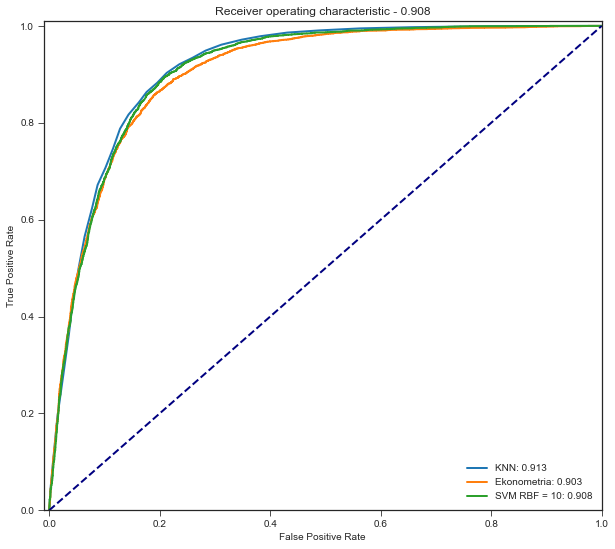

In [31]:
res2plot = []
true = (df[target]=="yes").astype(int).sort_index()
for result in [modelkNN, modelEkonometria, modelSVM]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)